# HW3
## Wine quality prediction

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import seaborn
import seaborn as sb

# import matplotlib
import matplotlib.pyplot as plt

import pickle

### Load file / Study Dataset

In [2]:
file_path= '/content/winequality-combined.csv'
df=pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())

    Type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [3]:
print(df.isnull().sum().sort_values(ascending=False).to_string())

Type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0


## Visualization

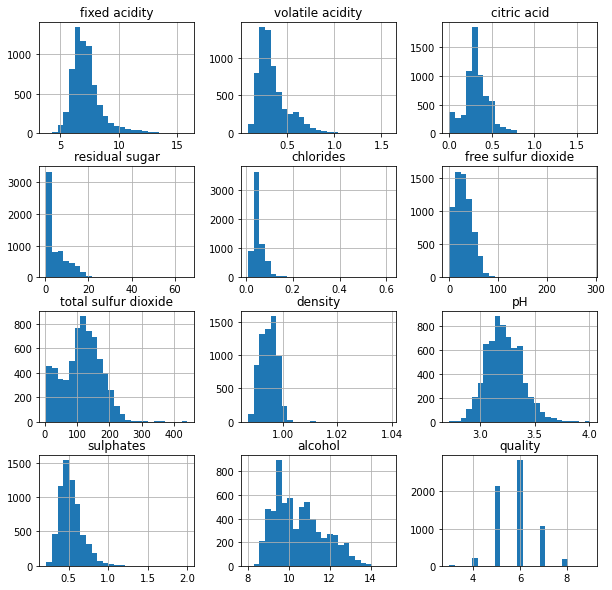

In [4]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

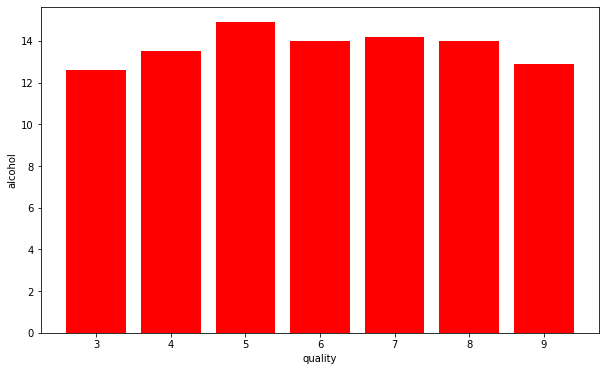

In [5]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

#Correlation





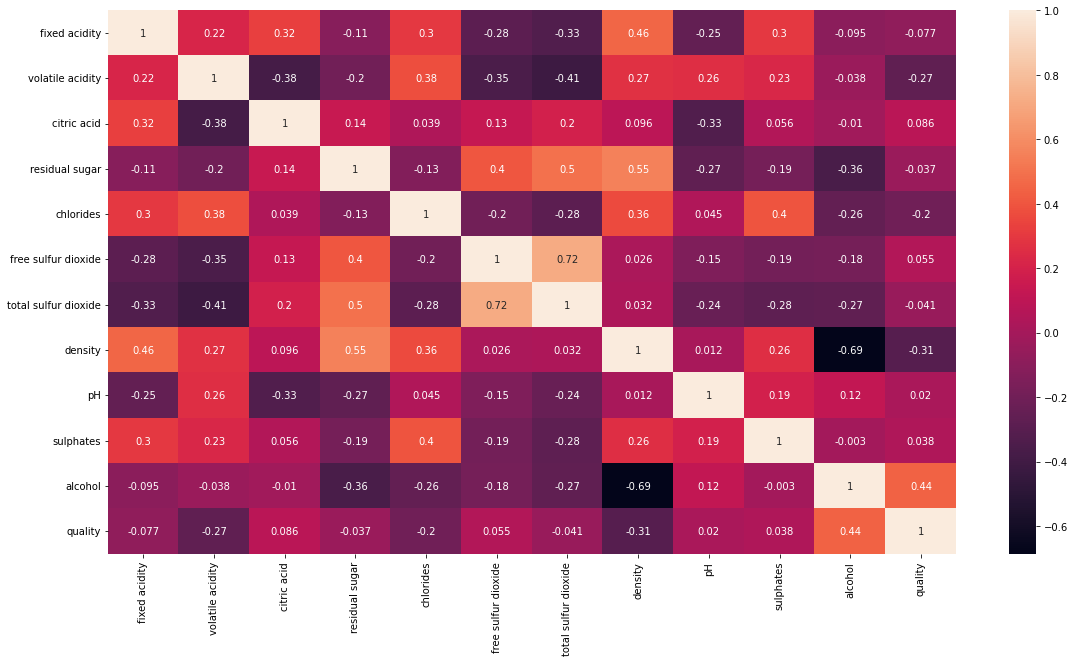

In [6]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='white')
sb.heatmap(df.corr(),annot=True)

#Remove features below 0.7



In [7]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


In [8]:
new_df=df.drop('total sulfur dioxide',axis=1)

In [9]:
new_df.isnull().sum()

Type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [10]:
# catogerical vars 
next_df = pd.get_dummies(new_df,drop_first=True)
# display new dataframe
next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


In [12]:
next_df['best quality'] = [ 1 if x>=7 else 0 for x in df.quality] 
print(next_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Create x and y dataframes



In [14]:
x = next_df.drop(columns=['quality'])

In [15]:
# use only the target values for Y
y=next_df[['quality']].values

##Splitting dataset


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

### Normalization

In [17]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)


[[0.34710744 0.1        0.22289157 ... 0.26086957 1.         0.        ]
 [0.20661157 0.18       0.15662651 ... 0.11594203 1.         0.        ]
 [0.24793388 0.06666667 0.18072289 ... 0.14492754 1.         1.        ]
 ...
 [0.33884298 0.38666667 0.         ... 0.2173913  0.         0.        ]
 [0.24793388 0.34       0.06024096 ... 0.24637681 0.         0.        ]
 [0.19008264 0.16666667 0.19277108 ... 0.2173913  1.         0.        ]]


In [40]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain,y_train)
y_pred= rnd.predict(new_xtest).astype("int32")
# predicting score
rnd_score = rnd.score(new_xtest,y_test)
print('score of model is : ',rnd_score)
# display error rate
print('calculating the error')
# calculating mean squared error
MSE = mean_squared_error(y_test,y_pred)
# calculating root mean squared error
rnd_RMSE = np.sqrt(MSE)
# display MSE
print('mean squared error is : ',MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(y_pred,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


score of model is :  0.7946153846153846
calculating the error
mean squared error is :  0.2653846153846154
root mean squared error is :  0.5151549430847144
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.15      0.60      0.24        10
           5       0.71      0.76      0.73       400
           6       0.87      0.78      0.82       619
           7       1.00      0.88      0.94       257
           8       0.33      1.00      0.50        14
           9       0.00      0.00      0.00         0

    accuracy                           0.79      1300
   macro avg       0.44      0.57      0.46      1300
weighted avg       0.83      0.79      0.81      1300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
